In [ ]:
# 用sklearn.preprocessing.StandardScaler对数据进行标准化

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in np, pd ,sklearn, tf, keras:
    print(module.__name__,module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=6, releaselevel='final', serial=0)
numpy 1.18.1
pandas 1.0.1
sklearn 0.22.2
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()


print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
x_train.reshape(-1,1).astype(np.float32)

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [4]:
#x = (x - u) / std
#先将图片转化为一维数组，标准化后在转回图片
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaler = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)


In [5]:
print(np.max(x_train),np.min(x_train))
print(np.max(x_train_scaler),np.min(x_train_scaler))


255 0
2.022409 -0.8102577


In [8]:
#tf.keras.models.Sequential()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape =[28,28]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])    
# relu:  y=max(0,x)
# softmax:将向量变成概率分布，x =[x1,x2,x3]
#                y=[e^x1/sum,e^x2/sum,e^x3/sum], sum=e^x1+e^x2+e^x36

# sparse的原因：将y的分类转换为one_hot编码
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             optimizer = 'sgd',
             metrics = ['accuracy'])


In [9]:
history = model.fit(x_train_scaler,y_train,epochs=10,
         validation_split=0.1)
#validation_data:训练过程中在验证集验证

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 10s 193us/sample - loss: 0.5663 - accuracy: 0.8006 - val_loss: 0.4515 - val_accuracy: 0.8345
Epoch 2/10
54000/54000 [==============================] - 9s 162us/sample - loss: 0.4274 - accuracy: 0.8486 - val_loss: 0.4225 - val_accuracy: 0.8450
Epoch 3/10
54000/54000 [==============================] - 9s 162us/sample - loss: 0.3905 - accuracy: 0.8617 - val_loss: 0.4028 - val_accuracy: 0.8507
Epoch 4/10
54000/54000 [==============================] - 9s 164us/sample - loss: 0.3689 - accuracy: 0.8684 - val_loss: 0.3743 - val_accuracy: 0.8647
Epoch 5/10
54000/54000 [==============================] - 9s 173us/sample - loss: 0.3512 - accuracy: 0.8737 - val_loss: 0.3705 - val_accuracy: 0.8635
Epoch 6/10
54000/54000 [==============================] - 10s 177us/sample - loss: 0.3374 - accuracy: 0.8798 - val_loss: 0.3564 - val_accuracy: 0.8695
Epoch 7/10
54000/54000 [=========================

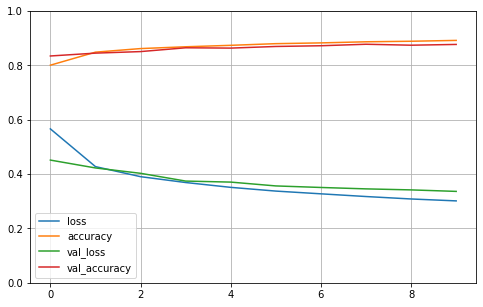

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=[8,5])
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)

In [ ]:
model.evaluate(x_te)